# HACKEREARTH OF GENETICS AND GENOME CHALLENGE

## Packages :

In [32]:
# Standard Packages :
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import missingpy
from sklearn.model_selection import train_test_split

# deep learning packages :
# tensorflow :
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
# keras :
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer,BatchNormalization,GaussianDropout,AlphaDropout
from tensorflow.keras import optimizers,layers,initializers,regularizers,activations,losses,metrics
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import model_to_dot

# visualization packages :
from matplotlib import pyplot as plt
from IPython.display import SVG

## Datasets :

In [3]:
# Train Datasets :

train = pd.read_csv("K:/Hackerath Hackathon 2021/Hackerearth OfGenomes and Genetics Challenge/Dataset/train.csv")

# Test Datasets :

test = pd.read_csv("K:/Hackerath Hackathon 2021/Hackerearth OfGenomes and Genetics Challenge/Dataset/test.csv")

print("Train Datasets : \n\n" ,train.head())
print("Test Datasets  : \n\n" ,test.head())

Train Datasets : 

   Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre

## Removing Unnecessary Columns :

In [96]:
edited_train = train.drop(['Patient Id','Patient First Name','Family Name',"Father's name"],axis='columns')

edited_test = test.drop(['Patient Id','Patient First Name','Family Name',"Father's name"],axis='columns')


In [97]:
edited_train.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='ob

## Checking missing values :

In [98]:
edited_train.isnull().sum()

Patient Age                                          1427
Genes in mother's side                                  0
Inherited from father                                 306
Maternal gene                                        2810
Paternal gene                                           0
Blood cell count (mcL)                                  0
Mother's age                                         6036
Father's age                                         5986
Institute Name                                       5106
Location of Institute                               10931
Status                                                  0
Respiratory Rate (breaths/min)                       2149
Heart Rate (rates/min                                2113
Test 1                                               2127
Test 2                                               2152
Test 3                                               2147
Test 4                                               2140
Test 5        

In [99]:
edited_test.isnull().sum()

Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                           0
Father's age                                           0
Institute Name                                      5004
Location of Institute                               4760
Status                                                 0
Respiratory Rate (breaths/min)                      4991
Heart Rate (rates/min                               4974
Test 1                                              2120
Test 2                                              2081
Test 3                                              2099
Test 4                                              2082
Test 5                         

## Encoding Columns :

In [100]:
edited_train['Location of Institute'] = pd.factorize(edited_train['Location of Institute'])[0]
edited_train['Institute Name'] = pd.factorize(edited_train['Institute Name'])[0]
edited_train['Test 1'] = pd.factorize(edited_train['Test 1'])[0]
edited_train['Test 2'] = pd.factorize(edited_train['Test 2'])[0]
edited_train['Test 3'] = pd.factorize(edited_train['Test 3'])[0]
edited_train['Test 4'] = pd.factorize(edited_train['Test 4'])[0]
edited_train['Test 5'] = pd.factorize(edited_train['Test 5'])[0]
edited_train['Gender'] = pd.factorize(edited_train['Gender'])[0]
edited_train['Autopsy shows birth defect (if applicable)'] = pd.factorize(edited_train['Autopsy shows birth defect (if applicable)'])[0]
edited_train['Place of birth'] = pd.factorize(edited_train['Place of birth'])[0]
edited_train['Folic acid details (peri-conceptional)'] = pd.factorize(edited_train['Folic acid details (peri-conceptional)'])[0]
edited_train['H/O serious maternal illness'] = pd.factorize(edited_train['H/O serious maternal illness'])[0]
edited_train['H/O radiation exposure (x-ray)'] = pd.factorize(edited_train['H/O radiation exposure (x-ray)'])[0]
edited_train['H/O substance abuse'] = pd.factorize(edited_train['H/O substance abuse'])[0]
edited_train['Assisted conception IVF/ART'] = pd.factorize(edited_train['Assisted conception IVF/ART'])[0]
edited_train['History of anomalies in previous pregnancies'] = pd.factorize(edited_train['History of anomalies in previous pregnancies'])[0]
edited_train['Birth defects'] = pd.factorize(edited_train['Birth defects'])[0]
edited_train['Blood test result'] = pd.factorize(edited_train['Blood test result'])[0]
edited_train['Symptom 1'] = pd.factorize(edited_train['Symptom 1'])[0]
edited_train['Symptom 2'] = pd.factorize(edited_train['Symptom 2'])[0]
edited_train['Symptom 3'] = pd.factorize(edited_train['Symptom 3'])[0]
edited_train['Symptom 4'] = pd.factorize(edited_train['Symptom 4'])[0]
edited_train['Symptom 5'] = pd.factorize(edited_train['Symptom 5'])[0]
edited_train["Genes in mother's side"] = pd.factorize(edited_train["Genes in mother's side"])[0]
edited_train['Paternal gene'] = pd.factorize(edited_train['Paternal gene'])[0]
edited_train['Status'] = pd.factorize(edited_train['Status'])[0]
edited_train['Inherited from father'] = pd.factorize(edited_train['Inherited from father'])[0]
edited_train['Maternal gene'] = pd.factorize(edited_train['Maternal gene'])[0]
edited_train['Respiratory Rate (breaths/min)'] = pd.factorize(edited_train['Respiratory Rate (breaths/min)'])[0]
edited_train['Heart Rate (rates/min'] = pd.factorize(edited_train['Heart Rate (rates/min'])[0]
edited_train['Birth asphyxia'] = pd.factorize(edited_train['Birth asphyxia'])[0]
edited_train['Parental consent'] = pd.factorize(edited_train['Parental consent'])[0]
edited_train['Follow-up'] = pd.factorize(edited_train['Follow-up'])[0]

label1 = pd.factorize(edited_train['Genetic Disorder'])[1]
label2 = pd.factorize(edited_train['Disorder Subclass'])[1]

edited_train['Genetic Disorder'] = pd.factorize(edited_train['Genetic Disorder'])[0]
edited_train['Disorder Subclass'] = pd.factorize(edited_train['Disorder Subclass'])[0]

In [101]:
encoder1 = LabelEncoder()
genetic_disorder_encoded = encoder1.fit_transform(label1)
encoder2 = LabelEncoder()
disorder_subclass_encoded = encoder2.fit_transform(label2)


In [102]:
edited_test['Inherited from father'] = pd.factorize(edited_test['Inherited from father'])[0]
edited_test['Maternal gene'] = pd.factorize(edited_test['Maternal gene'])[0]
edited_test['Institute Name'] = pd.factorize(edited_test['Institute Name'])[0]
edited_test['Location of Institute'] = pd.factorize(edited_test['Location of Institute'])[0]
edited_test['Respiratory Rate (breaths/min)'] = pd.factorize(edited_test['Respiratory Rate (breaths/min)'])[0]
edited_test['Heart Rate (rates/min'] = pd.factorize(edited_test['Heart Rate (rates/min'])[0]
edited_test['Test 1'] = pd.factorize(edited_test['Test 1'])[0]
edited_test['Test 2'] = pd.factorize(edited_test['Test 2'])[0]
edited_test['Test 3'] = pd.factorize(edited_test['Test 3'])[0]
edited_test['Test 4'] = pd.factorize(edited_test['Test 4'])[0]
edited_test['Test 5'] = pd.factorize(edited_test['Test 5'])[0]
edited_test['Parental consent'] = pd.factorize(edited_test['Parental consent'])[0]
edited_test['Follow-up'] = pd.factorize(edited_test['Follow-up'])[0]
edited_test['Gender'] = pd.factorize(edited_test['Gender'])[0]
edited_test['Birth asphyxia'] = pd.factorize(edited_test['Birth asphyxia'])[0]
edited_test['Autopsy shows birth defect (if applicable)'] = pd.factorize(edited_test['Autopsy shows birth defect (if applicable)'])[0]
edited_test['Place of birth'] = pd.factorize(edited_test['Place of birth'])[0]
edited_test['Folic acid details (peri-conceptional)'] = pd.factorize(edited_test['Folic acid details (peri-conceptional)'])[0]
edited_test['H/O serious maternal illness'] = pd.factorize(edited_test['H/O serious maternal illness'])[0]
edited_test['H/O radiation exposure (x-ray)'] = pd.factorize(edited_test['H/O radiation exposure (x-ray)'])[0]
edited_test['H/O substance abuse'] = pd.factorize(edited_test['H/O substance abuse'])[0]
edited_test['Assisted conception IVF/ART'] = pd.factorize(edited_test['Assisted conception IVF/ART'])[0]
edited_test['History of anomalies in previous pregnancies'] = pd.factorize(edited_test['History of anomalies in previous pregnancies'])[0]
edited_test['Birth defects'] = pd.factorize(edited_test['Birth defects'])[0]
edited_test['Blood test result'] = pd.factorize(edited_test['Blood test result'])[0]
edited_test['Paternal gene'] = pd.factorize(edited_test['Paternal gene'])[0]
edited_test['Status'] = pd.factorize(edited_test['Status'])[0]
edited_test["Genes in mother's side"] = pd.factorize(edited_test["Genes in mother's side"])[0]
edited_test['Symptom 1'] = pd.factorize(edited_test['Symptom 1'])[0]
edited_test['Symptom 2'] = pd.factorize(edited_test['Symptom 2'])[0]
edited_test['Symptom 3'] = pd.factorize(edited_test['Symptom 3'])[0]
edited_test['Symptom 4'] = pd.factorize(edited_test['Symptom 4'])[0]
edited_test['Symptom 5'] = pd.factorize(edited_test['Symptom 5'])[0]



## Handling Missing Values :

In [103]:
edited_train = edited_train.replace(-1,np.nan)
edited_test = edited_test.replace(-1,np.nan)

In [104]:
edited_train.shape , edited_test.shape

((22083, 41), (9465, 39))

In [14]:
j = []
for i in range(41):
    j.append(i)
    
k = []
for i in range(39):
    k.append(i)

In [15]:
# Performing Imputation on train data :

imputer1 = missingpy.MissForest(random_state=42)
imputed_train = imputer1.fit_transform(edited_train.iloc[:,j])


# Performing imputation on test data :

imputer2 = missingpy.MissForest(random_state = 50)
imputed_test = imputer2.fit_transform(edited_test.iloc[:,k])


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2


In [105]:
edited_train.iloc[:,:] = imputed_train
edited_test.iloc[:,:] = imputed_test

In [110]:
edited_train

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,0.0,0.0,0.00,0.0,4.760603,36.2,40.94,0.00,0.00,...,0.31,9.857562,1.26,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1,4.0,0.0,1.0,1.00,0.0,4.910669,35.1,23.00,1.00,1.00,...,0.00,5.522560,0.00,0.0,0.34,0.0,0.0,1.00,2.0,1.0
2,6.0,0.0,0.0,1.00,0.0,4.893297,41.0,22.00,4.00,12.68,...,1.00,7.771881,0.00,1.0,0.00,0.0,0.0,0.00,1.0,2.0
3,12.0,0.0,0.0,0.00,0.0,4.705280,21.0,42.20,14.74,0.00,...,1.00,7.919321,1.00,1.0,1.00,0.0,1.0,1.00,0.0,3.0
4,11.0,0.0,0.0,0.58,1.0,4.720703,32.0,44.18,2.00,2.00,...,0.00,4.098210,1.51,1.0,1.00,1.0,1.0,1.00,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,0.0,1.0,0.00,0.0,5.258298,35.0,64.00,17.00,19.00,...,0.00,6.584811,1.00,1.0,1.00,0.0,1.0,1.00,0.0,3.0
22079,8.0,1.0,1.0,1.00,1.0,4.974220,34.9,56.00,22.00,12.00,...,0.00,7.041556,1.00,0.0,0.00,0.0,0.0,1.00,1.0,2.0
22080,8.0,0.0,0.0,0.00,0.0,5.186470,35.0,51.00,4.00,12.25,...,1.00,7.715464,0.00,1.0,1.00,1.0,0.0,0.35,0.0,7.0
22081,7.0,0.0,0.0,0.00,1.0,4.858543,19.0,44.27,4.00,10.71,...,0.00,8.437670,3.00,0.0,0.00,0.0,1.0,1.00,0.0,3.0


In [111]:
edited_test

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Institute Name,Location of Institute,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,0.0,0.00,0.00,0.0,4.981655,38.0,61.0,0.00,0.00,...,0.30,2.00,0.00,6.921911,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,1.0,1.00,0.67,1.0,5.118890,33.0,53.0,14.60,1.00,...,0.00,1.81,0.00,8.179584,1.0,1.0,1.0,1.0,0.0,1.0
2,5.0,0.0,0.58,0.00,0.0,4.876204,48.0,60.0,14.31,2.00,...,1.00,0.00,1.00,7.601921,0.0,1.0,1.0,0.0,0.0,1.0
3,13.0,0.0,0.00,1.00,0.0,4.687767,25.0,55.0,1.00,3.00,...,0.00,1.72,1.00,6.884071,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,0.0,0.59,0.72,1.0,5.152362,41.0,38.0,2.00,10.53,...,1.00,1.68,0.00,6.195178,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,1.0,0.00,0.79,0.0,4.878335,28.0,63.0,10.89,3.00,...,0.00,2.00,0.00,7.234960,3.0,1.0,0.0,0.0,0.0,1.0
9461,1.0,1.0,1.00,0.48,1.0,4.927151,37.0,62.0,11.99,5.00,...,1.00,1.68,1.00,4.859536,3.0,1.0,0.0,1.0,0.0,0.0
9462,2.0,0.0,0.00,0.00,0.0,4.898352,24.0,32.0,23.00,14.00,...,1.00,3.00,0.44,5.696062,1.0,1.0,0.0,1.0,1.0,0.0
9463,13.0,0.0,0.00,0.00,0.0,4.804840,36.0,56.0,2.00,10.78,...,0.49,1.00,1.00,3.000000,2.0,0.0,0.0,0.0,0.0,0.0


## Discretize the columns :¶

In [112]:
edited_train = round(edited_train,0).astype(int)
edited_test = round(edited_test,0).astype(int)

## Deep Learning : Keras Sequential Wide Deep Network 

## Phase 1 : Modelling for 'Genetic Disorder'

In [20]:
# Preparing keras model 

import tensorflow
tensorflow.random.set_seed(150)        # for reproductive reason

def baseline_model():
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape = [39]))
    model.add(BatchNormalization())
    model.add(Dense(512, activation = LeakyReLU(0.3),
                    kernel_initializer = initializers.glorot_normal(seed = 100),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001,l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(64, activation = LeakyReLU(0.3) , 
                    kernel_initializer = initializers.glorot_normal(seed = 200),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001 , l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(64, activation = LeakyReLU(0.3) , 
                    kernel_initializer = initializers.glorot_normal(seed = 300),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001 , l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(3, activation = 'softmax', 
                    kernel_initializer = initializers.he_normal(seed = 400),
                    use_bias = True))
    model.output_shape       # you can ignore this 
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer = "adam", 
                  metrics = "accuracy")
    
    return model

In [21]:
baseline_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 39)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 39)                156       
_________________________________________________________________
dense (Dense)                (None, 512)               20480     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

In [22]:
estimator = KerasClassifier(build_fn=baseline_model,  verbose = 1)

In [23]:
seed = 2

# fit model
history = estimator.fit(edited_train.iloc[:,:39] , edited_train['Genetic Disorder'] , 
                        validation_split = 0.2, 
                        epochs=20, 
                        verbose=1, 
                        batch_size = 32)


Epoch 1/20
553/553 [==============================] - 27s 7ms/step - loss: 1.0446 - accuracy: 0.4883 - val_loss: 0.7990 - val_accuracy: 0.6577
Epoch 2/20
553/553 [==============================] - 3s 5ms/step - loss: 0.7965 - accuracy: 0.6256 - val_loss: 0.7392 - val_accuracy: 0.6622
Epoch 3/20
553/553 [==============================] - 2s 4ms/step - loss: 0.7716 - accuracy: 0.6408 - val_loss: 0.7439 - val_accuracy: 0.6670
Epoch 4/20
553/553 [==============================] - 2s 4ms/step - loss: 0.7697 - accuracy: 0.6376 - val_loss: 0.7259 - val_accuracy: 0.6690
Epoch 5/20
553/553 [==============================] - 2s 4ms/step - loss: 0.7627 - accuracy: 0.6379 - val_loss: 0.7189 - val_accuracy: 0.6708
Epoch 6/20
553/553 [==============================] - 3s 5ms/step - loss: 0.7394 - accuracy: 0.6502 - val_loss: 0.7412 - val_accuracy: 0.6658
Epoch 7/20
553/553 [==============================] - 2s 4ms/step - loss: 0.7406 - accuracy: 0.6561 - val_loss: 0.7024 - val_accuracy: 0.6817
Epoch

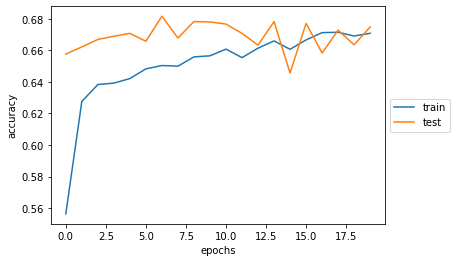

In [24]:
# plot model performance for 'Genetic Disorder':
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc ='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(xlabel="epochs")
plt.ylabel(ylabel="accuracy")
plt.show()

### Observation : We see 80% train data gives accuracy 0.6740 and 20% train data treated as valid data is giving 0.6749 accuracy.  

## Phase 2 : Modelling for 'Disorder Subclass' 

In [25]:
# Preparing keras model 

import tensorflow
tensorflow.random.set_seed(350)        # for reproductive reason

def baseline_model2():
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape = [40]))
    model.add(BatchNormalization())
    model.add(Dense(512, activation = LeakyReLU(0.3),
                    kernel_initializer = initializers.glorot_normal(seed = 100),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001,l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(64, activation = LeakyReLU(0.3) , 
                    kernel_initializer = initializers.glorot_normal(seed = 200),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001 , l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(64, activation = LeakyReLU(0.3) , 
                    kernel_initializer = initializers.glorot_normal(seed = 300),
                    bias_regularizer = regularizers.L1L2(l1 = 0.001 , l2 = 0.001),
                    bias_initializer = 'zeros',
                    use_bias = True))
    model.add(BatchNormalization())
    model.add(AlphaDropout(0.025))
    model.add(Dense(9, activation = 'softmax', 
                    kernel_initializer = initializers.he_normal(seed = 400),
                    use_bias = True))
    model.output_shape       # you can ignore this 
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer = "adam", 
                  metrics = "accuracy")
    
    return model

In [26]:
baseline_model2().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 40)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 40)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 512)               20992     
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
alpha_dropout_6 (AlphaDropou (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)               

In [27]:
estimator2 = KerasClassifier(build_fn=baseline_model2,  verbose = 1)

In [28]:
seed = 10

# fit model
history2 = estimator2.fit(edited_train.iloc[:,:40] , edited_train['Disorder Subclass'] , 
                        validation_split = 0.2, 
                        epochs=24, 
                        verbose=1, 
                        batch_size = 32)

Epoch 1/24
553/553 [==============================] - 6s 5ms/step - loss: 1.1775 - accuracy: 0.5735 - val_loss: 0.6886 - val_accuracy: 0.7295
Epoch 2/24
553/553 [==============================] - 2s 4ms/step - loss: 0.7679 - accuracy: 0.7060 - val_loss: 0.6696 - val_accuracy: 0.7342
Epoch 3/24
553/553 [==============================] - 2s 4ms/step - loss: 0.7432 - accuracy: 0.7049 - val_loss: 0.6567 - val_accuracy: 0.7455
Epoch 4/24
553/553 [==============================] - 2s 4ms/step - loss: 0.7075 - accuracy: 0.7178 - val_loss: 0.6762 - val_accuracy: 0.7338
Epoch 5/24
553/553 [==============================] - 2s 4ms/step - loss: 0.7021 - accuracy: 0.7235 - val_loss: 0.6467 - val_accuracy: 0.7458
Epoch 6/24
553/553 [==============================] - 2s 4ms/step - loss: 0.6895 - accuracy: 0.7232 - val_loss: 0.6467 - val_accuracy: 0.7415
Epoch 7/24
553/553 [==============================] - 2s 4ms/step - loss: 0.6854 - accuracy: 0.7321 - val_loss: 0.6491 - val_accuracy: 0.7471
Epoch 

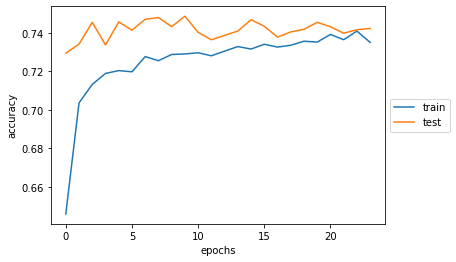

In [29]:
# plot model performance for 'Disorder Subclass':
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend(loc ='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(xlabel="epochs")
plt.ylabel(ylabel="accuracy")
plt.show()

### Observation : We see 80% train data gives accuracy 0.73 and 20% train data treated as valid data is giving 0.74 accuracy.

## So we see in both the phases there is no overfitting and model is responding nicely to the valid 20% of train data . We will use 'baseline_model' and 'baseline_model2' setup for deployment stage.

# 

##  Deployment :

## Phase 1 : 'Genetic Disorder' 

### Displaying Network :  

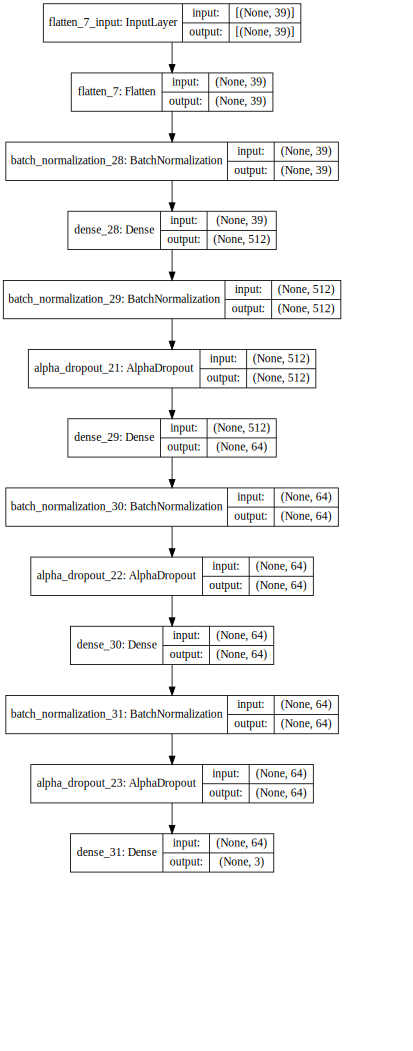

In [37]:
SVG(model_to_dot(baseline_model(), show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

In [107]:
# preparing the estimator with the full data :

final_estimator = KerasClassifier(build_fn=baseline_model,  verbose = 1 , shuffle = True)

## Genetic Disorder Prediction utilizing full train data for the test data : 

In [108]:
valid_data = edited_train.sample(frac=0.2, random_state=42 )         
print(edited_train.shape)
print(valid_data.shape)

(22083, 41)
(4417, 41)


Epoch 1/1500
691/691 [==============================] - 6s 5ms/step - loss: 1.0167 - accuracy: 0.4965 - val_loss: 0.7707 - val_accuracy: 0.6586
Epoch 2/1500
691/691 [==============================] - 3s 4ms/step - loss: 0.7777 - accuracy: 0.6357 - val_loss: 0.7417 - val_accuracy: 0.6697
Epoch 3/1500
691/691 [==============================] - 3s 5ms/step - loss: 0.7642 - accuracy: 0.6440 - val_loss: 0.7274 - val_accuracy: 0.6719
Epoch 4/1500
691/691 [==============================] - 3s 5ms/step - loss: 0.7543 - accuracy: 0.6493 - val_loss: 0.7330 - val_accuracy: 0.6710
Epoch 5/1500
691/691 [==============================] - 3s 5ms/step - loss: 0.7578 - accuracy: 0.6484 - val_loss: 0.7069 - val_accuracy: 0.6801
Epoch 6/1500
691/691 [==============================] - 3s 5ms/step - loss: 0.7416 - accuracy: 0.6533 - val_loss: 0.7019 - val_accuracy: 0.6790
Epoch 7/1500
691/691 [==============================] - 3s 4ms/step - loss: 0.7320 - accuracy: 0.6642 - val_loss: 0.7049 - val_accuracy:

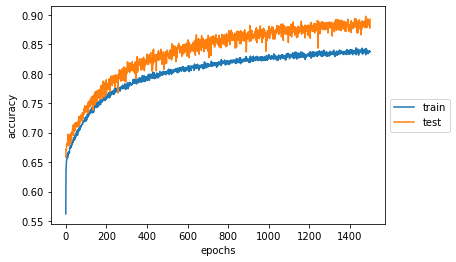

C:\Users\Avik\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


296/296 [==============================] - 1s 1ms/step


In [113]:
h1 = final_estimator.fit(edited_train.iloc[:,:39] , edited_train['Genetic Disorder'] , epochs=1500, verbose=1, batch_size = 32,
                   validation_data = (valid_data.iloc[:,:39] , valid_data['Genetic Disorder']) )
# plot history
plt.plot(h1.history['accuracy'], label='train')
plt.plot(h1.history['val_accuracy'], label='test')
plt.legend(loc ='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(xlabel="epochs")
plt.ylabel(ylabel="accuracy")
plt.show()

# making prediction in test data :
Genetic_Disorder_pred = final_estimator.predict(edited_test)

## Observation : On full train data accuracy is 0.836 approx. 
## Plot reveals that the model is performing better and giving a prediction accuracy of 0.892 approximately on validation data . 
## Finally we have make prediction 'Genetic_Disorder_pred' in encoded format for the original test data and then rolling back the prediction in categorical format

In [114]:
Genetic_Disorder = encoder1.inverse_transform(Genetic_Disorder_pred)
Genetic_Disorder

array(['Multifactorial genetic inheritance disorders',
       'Mitochondrial genetic inheritance disorders',
       'Mitochondrial genetic inheritance disorders', ...,
       'Mitochondrial genetic inheritance disorders',
       'Single-gene inheritance diseases',
       'Multifactorial genetic inheritance disorders'], dtype=object)

In [115]:
edited_test['Genetic_Disorder'] = Genetic_Disorder_pred

# 

## Phase 2 : 'Disorder Subclass' 

### Displaying Network :

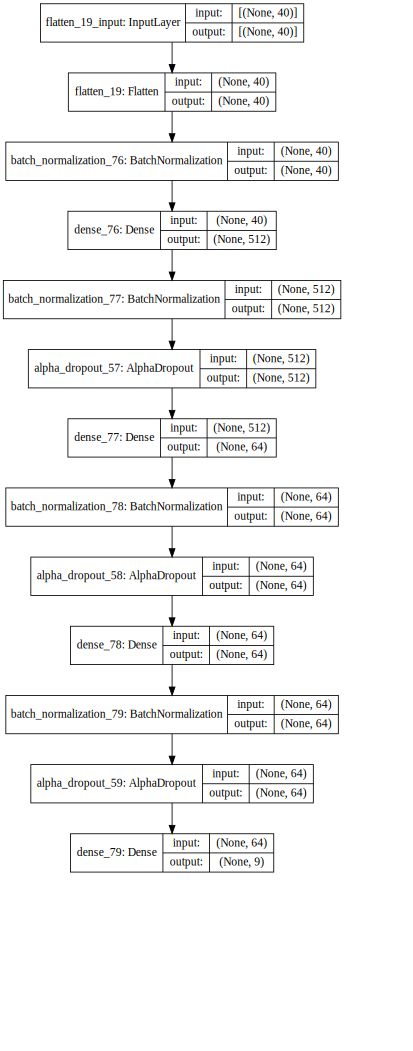

In [89]:
SVG(model_to_dot(baseline_model2(), show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

In [116]:
# preparing the estimator with the full data :

final_estimator2 = KerasClassifier(build_fn=baseline_model2,  verbose = 1 , shuffle = True)

## Disorder Subclass Prediction utilizing full train data for the test data :

Epoch 1/910
691/691 [==============================] - 6s 5ms/step - loss: 1.1300 - accuracy: 0.5823 - val_loss: 0.6533 - val_accuracy: 0.7138
Epoch 2/910
691/691 [==============================] - 3s 4ms/step - loss: 0.7316 - accuracy: 0.7097 - val_loss: 0.6584 - val_accuracy: 0.7156
Epoch 3/910
691/691 [==============================] - 3s 4ms/step - loss: 0.7137 - accuracy: 0.7187 - val_loss: 0.6407 - val_accuracy: 0.7231
Epoch 4/910
691/691 [==============================] - 3s 4ms/step - loss: 0.7106 - accuracy: 0.7185 - val_loss: 0.6450 - val_accuracy: 0.7231
Epoch 5/910
691/691 [==============================] - 3s 4ms/step - loss: 0.6848 - accuracy: 0.7279 - val_loss: 0.6226 - val_accuracy: 0.7263
Epoch 6/910
691/691 [==============================] - 3s 4ms/step - loss: 0.6823 - accuracy: 0.7315 - val_loss: 0.6293 - val_accuracy: 0.7206
Epoch 7/910
691/691 [==============================] - 3s 4ms/step - loss: 0.6758 - accuracy: 0.7300 - val_loss: 0.6305 - val_accuracy: 0.7218

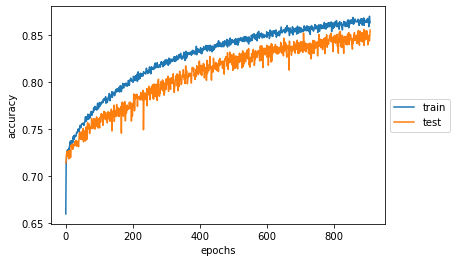

C:\Users\Avik\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


296/296 [==============================] - 1s 2ms/step


In [117]:
h2 = final_estimator2.fit(edited_train.iloc[:,:40] , edited_train['Disorder Subclass'] , epochs=910, verbose=1, batch_size = 32,
                   validation_data = (valid_data.iloc[:,:40] , valid_data['Disorder Subclass']) )
# plot history
plt.plot(h2.history['accuracy'], label='train')
plt.plot(h2.history['val_accuracy'], label='test')
plt.legend(loc ='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(xlabel="epochs")
plt.ylabel(ylabel="accuracy")
plt.show()

# making prediction in test data :
Disorder_Subclass_pred = final_estimator2.predict(edited_test)

## Observation : On full train data accuracy is 0.866 approx. 
## Plot reveals that the model is performing better and giving a prediction accuracy of 0.856 approximately on validation data which is no longer an unseen data . 
## Finally we have make prediction 'Disorder_Subclass_pred' in encoded format for the original test data and then rolling back to the given categorical format.

In [118]:
Disorder_Subclass = encoder2.inverse_transform(Disorder_Subclass_pred)
Disorder_Subclass

array(['Cystic fibrosis', 'Mitochondrial myopathy', 'Diabetes', ...,
       'Diabetes', 'Cancer', 'Tay-Sachs'], dtype=object)

# 

## Output layout :

In [119]:
edited_test['Disorder Subclass'] = Disorder_Subclass
edited_test['Genetic_Disorder'] = Genetic_Disorder

### Preparing Submission File : 

In [120]:
submission = pd.DataFrame({
    'Patient Id':test['Patient Id'].values,
    'Genetic Disorder': edited_test['Genetic_Disorder'].values,
    'Disorder Subclass': edited_test['Disorder Subclass'].values
})

## Exporting Submission File in csv format : 

In [121]:
submission.to_csv("C:/Users/Avik/Desktop/OfGeneticsGenomeSubmission.csv",index=False,header=True)

In [69]:
# Giving leaderboard rank 14 , score is 35.60

# 

# 

## ################################## THE END ################################# # 